In [1]:
# The code was removed by Watson Studio for sharing.

## The Battle of the Neighborhoods - Week 5

###  Download and Explore New York city and its Boroughs Cuisine dataset

#### Download all the dependencies that is need.

In [4]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.0.3
Wordcloud is installed and imported!


This data is extracted from the wikipedia Page - https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

In [13]:
# Fetch the file\

NYC_CUISINE=pd.read_csv(r'NY_cuisine.csv')
NYC_CUISINE.columns = ["Borough", "Neighborhood", "Cuisine"]
NYC_CUISINE.head()

,Borough,Neighborhood,Cuisine
0,Brooklyn,Bedford-Stuyvesant,"Italian,Albanian"
1,Brooklyn,Bensonhurst,"Italian,Seafood"
2,Brooklyn,Borough Park,"Italian,Albanian"
3,Brooklyn,Brighton Beach,Filipino
4,Brooklyn,Barren Island,Jewish


In [11]:
NYC_CUISINE.shape

(56, 3)

In [12]:
print(NYC_CUISINE.Borough.unique())

['Brooklyn' 'Queens' 'Manhattn' 'Bronx' 'Staten Island']


In [14]:
NYC_CUISINE['Borough'].value_counts().to_frame()

,Borough
Brooklyn,18
Queens,14
Manhattn,12
Bronx,9
Staten Island,3


### 1. NEW YORK CITY CUISINE - WORD CLOUD

In [15]:
CUISINE_WC = NYC_CUISINE[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Italian,Albanian"
1,"Italian,Seafood"
2,"Italian,Albanian"
3,Filipino
4,Jewish
5,"Puerto Rican, Dominican"
6,"Jamaican, West Indian"
7,Irish
8,"Greek, Italian, Eastern European, Brazilian"
9,"Indian,Pakistani"


In [16]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [17]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

Use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.

In [18]:
stopwords = set(STOPWORDS)

In [19]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

The `word` cloud is created, let's visualize it.

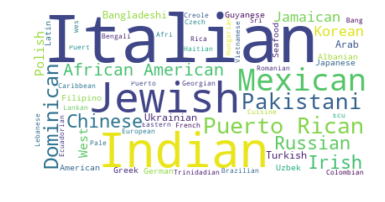

<Figure size 2160x3240 with 0 Axes>

In [20]:
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in New York City -<Br>
1. Italian<Br>
2. Jewish<Br>
3. Indian<Br>
4. Mexican<Br>
5. Pakistani<Br>
6. Russian<Br>
7. Dominican

### BROOKLYN CUISINE - WORD CLOUD

In [21]:
Brooklyn_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Cuisine
0,Brooklyn,Bedford-Stuyvesant,"Italian,Albanian"
1,Brooklyn,Bensonhurst,"Italian,Seafood"
2,Brooklyn,Borough Park,"Italian,Albanian"
3,Brooklyn,Brighton Beach,Filipino
4,Brooklyn,Barren Island,Jewish


In [22]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC

,Cuisine
0,"Italian,Albanian"
1,"Italian,Seafood"
2,"Italian,Albanian"
3,Filipino
4,Jewish
5,"Puerto Rican, Dominican"
6,"Jamaican, West Indian"
7,Irish
8,"Greek, Italian, Eastern European, Brazilian"
9,"Indian,Pakistani"


In [23]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

In [24]:
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

In [25]:
stopwords = set(STOPWORDS)

In [26]:
# instantiate a word cloud object
BR_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BR_CUISINE_NYC.generate(BR_CUISINE_WC)

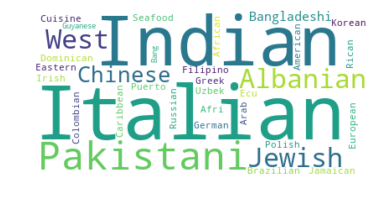

<Figure size 2160x3240 with 0 Axes>

In [27]:
# display the word cloud
plt.imshow(BR_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in Brooklyn is -<Br>
1. Italian<Br>
2. Indian<Br>
3. Pakstani<Br>

### QUEENS CUISINE - WORD CLOUD

In [28]:
Queens_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Cuisine
0,Queens,Bellaire,"Irish, Jewish"
1,Queens,Brookville,"Irish, Dominican, Mexican, Guyanese"
2,Queens,Cambria Heights,"Filipino, Irish, Mexican, and Romanian"
3,Queens,Hollis Hills,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
4,Queens,Hollis,"African-American, Jamaican, Trinidadian, Puert..."


In [29]:
Q_CUISINE_WC = Queens_data[['Cuisine']]
Q_CUISINE_WC

,Cuisine
0,"Irish, Jewish"
1,"Irish, Dominican, Mexican, Guyanese"
2,"Filipino, Irish, Mexican, and Romanian"
3,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
4,"African-American, Jamaican, Trinidadian, Puert..."
5,"Italian, Chinese, Turkish, Russian, Mexican"
6,"Jewish, Italian, Mexican, Chinese"
7,"Russian, Georgian, Turkish, Pakistani, Ukrainian"
8,"Puerto Rican, Mexican, Dominican,Ecuadorian"
9,"Jamaican, West Indian, African-American"


In [30]:
Q_CUISINE_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)

In [31]:
Q_CUISINE_WC = open('Q_CUISINE.txt', 'r').read()

In [32]:
stopwords = set(STOPWORDS)

In [33]:
# instantiate a word cloud object
Q_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_CUISINE_NYC.generate(Q_CUISINE_WC)

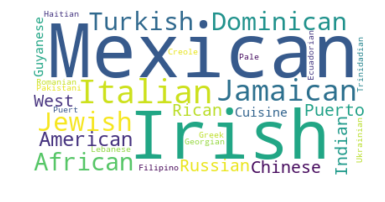

<Figure size 2160x3240 with 0 Axes>

In [34]:
# display the word cloud
plt.imshow(Q_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in Queens is -<Br>
1. Mexican<Br>
2. Irish<Br>
3. Jamaican<Br>
4. Italian

### MANHATTAN CUISINE - WORD CLOUD

In [42]:
Manhattan_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Manhattn'].reset_index(drop=True)
Manhattan_data.head()

,Borough,Neighborhood,Cuisine
0,Manhattn,Bloomfield,"Polish,Ukrainian"
1,Manhattn,Brighton Heights,"Bengali, Pakistani, Mexican, Uzbek,Polish"
2,Manhattn,Bulls Head,"Jewish, Italian, Russian,Pakistani"
3,Manhattn,Castleton Corners,"Italian, Irish, French,Puerto Rican"
4,Manhattn,Charleston,"Puerto Rican, African-American,Italian"


In [43]:
MN_CUISINE_WC = Manhattan_data[['Cuisine']]
MN_CUISINE_WC

,Cuisine
0,"Polish,Ukrainian"
1,"Bengali, Pakistani, Mexican, Uzbek,Polish"
2,"Jewish, Italian, Russian,Pakistani"
3,"Italian, Irish, French,Puerto Rican"
4,"Puerto Rican, African-American,Italian"
5,"Seafood, Russian, Italian"
6,"Puerto Rican, Chinese, Arab, Mexican, Italian"
7,"Italian, Jewish, Dominican,Puerto Rica"
8,"Mexican, Indian, Italian"
9,"Italian, Russian, Arab , Polish"


In [44]:
MN_CUISINE_WC.to_csv('MN_CUISINE.txt', sep=',', index=False)

In [45]:
MN_CUISINE_WC = open('MN_CUISINE.txt', 'r').read()

In [46]:
stopwords = set(STOPWORDS)

In [47]:
# instantiate a word cloud object
MN_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
MN_CUISINE_NYC.generate(MN_CUISINE_WC)

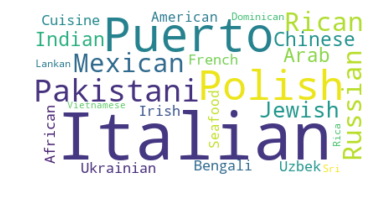

<Figure size 2160x3240 with 0 Axes>

In [48]:
# display the word cloud
plt.imshow(MN_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in Manhattan is -<Br>
1. Italian<Br>
2. Puerto Rican<Br>
3. Polish<Br>
4. Pakistani

### THE BRONX CUISINE - WORD CLOUD

In [56]:
Bronx_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Bronx'].reset_index(drop=True)
Bronx_data.head()

,Borough,Neighborhood,Cuisine
0,Bronx,Bathgate,"Puerto Rican, Mexican, Dominican,Italian"
1,Bronx,Claremont,"Japanese, Korean, Indian , Ukrainian"
2,Bronx,Concourse,Italian
3,Bronx,East Tremont,"Italian, African-American, Latin American, Wes..."
4,Bronx,Highbridge,Korean


In [57]:
BX_CUISINE_WC = Bronx_data[['Cuisine']]
BX_CUISINE_WC

,Cuisine
0,"Puerto Rican, Mexican, Dominican,Italian"
1,"Japanese, Korean, Indian , Ukrainian"
2,Italian
3,"Italian, African-American, Latin American, Wes..."
4,Korean
5,Italian
6,"Puerto Rican, Jewish, Italian, Latin American"
7,"Indian, Pakistani , Bangladeshi"
8,"Dominican, Puerto Rican, Italian , Jewish"


In [58]:
BX_CUISINE_WC.to_csv('BX_CUISINE.txt', sep=',', index=False)

In [59]:
BX_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()

In [60]:
stopwords = set(STOPWORDS)

In [61]:
# instantiate a word cloud object
BX_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BX_CUISINE_NYC.generate(BX_CUISINE_WC)

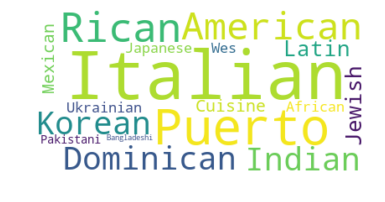

<Figure size 2160x3240 with 0 Axes>

In [62]:
# display the word cloud
plt.imshow(BX_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in The Bronx is - <Br>
1. Italian<Br>
2. Puerto Rican<Br>
3. American<Br>
4. Dominican